# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [4]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

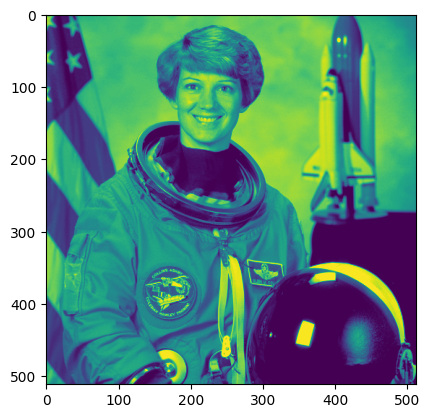

In [5]:
ast=plt.imread('data/astronaut.png')
plt.imshow(ast)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [43]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            y= q[0]+p[0]-n
            x= q[1]+p[1]-n
            
            if y< img_in.shape[0] and y>=0 and x>=0 and x< img_in.shape[1]:
                neighborhood_sum += img_in[y,x]
            else:
                neighborhood_sum = 0
                break

        result[p] = neighborhood_sum/(size**2)
            
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

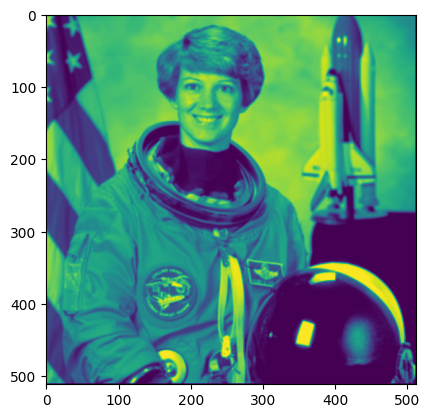

In [30]:
plt.imshow(meanfilter(ast, 3))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [31]:
assert numpy.allclose(meanfilter(ast, 5), plt.imread('data/astronaut_meanfilter5.png'), atol = 1/255)

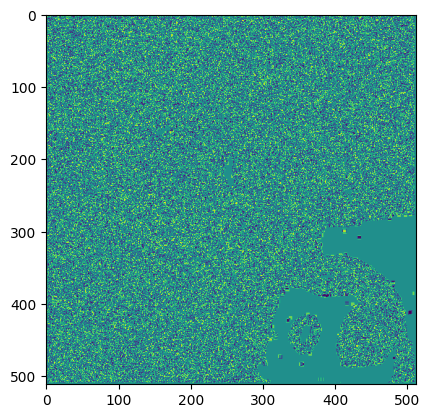

In [34]:
plt.imshow(meanfilter(ast, 5) - plt.imread('data/astronaut_meanfilter5.png'))


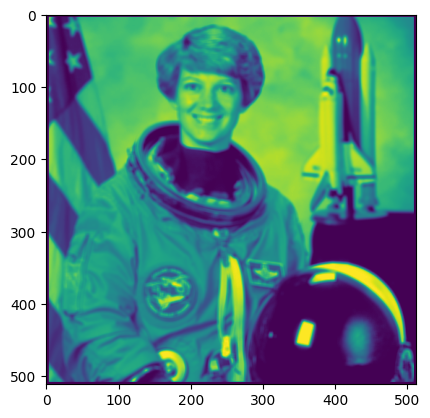

In [25]:
plt.imshow(meanfilter(ast, 5))

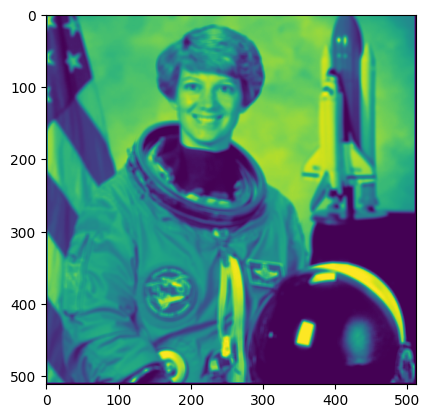

In [15]:
plt.imshow (plt.imread('data/astronaut_meanfilter5.png'))

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [85]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_list = []
        median_list = []
        if p[0]< img_in.shape[0]-n and p[0]>=n and p[1]>=n and p[1]< img_in.shape[1]-n:
            for q in numpy.ndindex(size,size):
                x= q[0]+p[0]-n
                y= q[1]+p[1]-n 
                median_list.append(img_in[x,y])
                median_list.sort()       
            m = len(median_list)
            result[p] = median_list[m//2]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

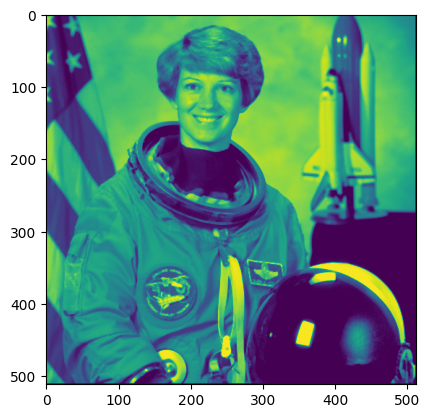

In [86]:
plt.imshow(medianfilter(ast, 3))

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [87]:
assert numpy.allclose(medianfilter(ast, 5), plt.imread('data/astronaut_medianfilter5.png'), atol = 1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [88]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

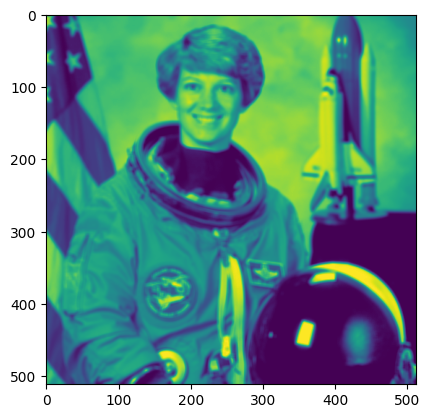

In [90]:
plt.imshow(scipy.ndimage.uniform_filter(ast, 5))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

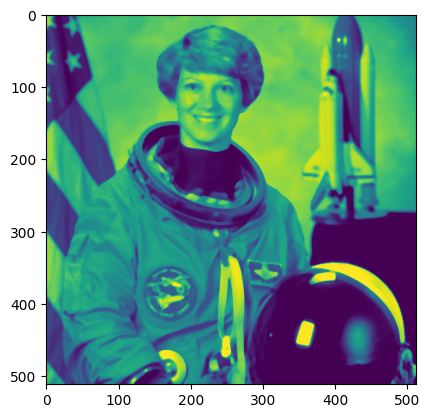

In [91]:
plt.imshow(scipy.ndimage.median_filter(ast, 5))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

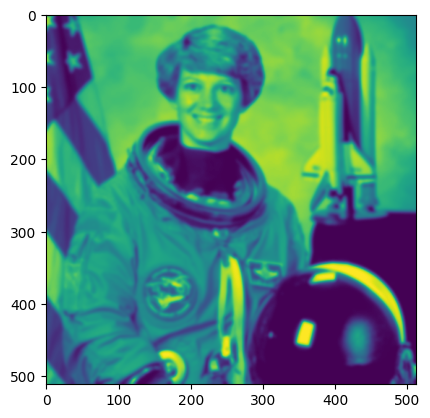

In [93]:
plt.imshow(scipy.ndimage.gaussian_filter(ast, 2))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

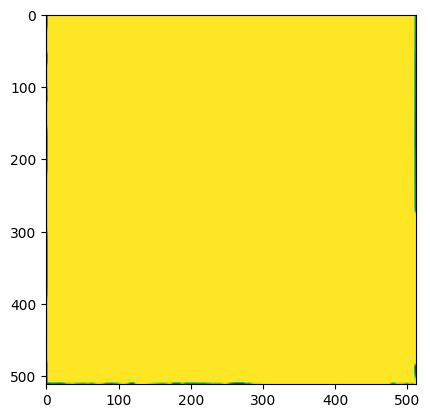

In [96]:
plt.imshow(meanfilter(ast, 5) - scipy.ndimage.uniform_filter(ast, 5))

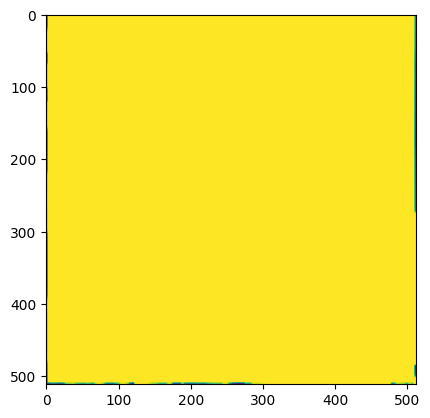

In [95]:
plt.imshow(medianfilter(ast, 5) - scipy.ndimage.median_filter(ast, 5))


The Edges are different (not only black)-> maybe they are left as they are or a "likely" value is taken for the pixels at the edge

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [97]:
def fastfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        if p[0]< img_in.shape[0]-n and p[0]>=n and p[1]>=n and p[1]< img_in.shape[1]-n:
            i0=p[0]-n
            i1=i0+size
            j0=p[1]-n
            j1=j0+size
        result[p] = mean(img_in[i0:i1, j0:j1])  
            
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: